4422102/4422102 [==============================] - 0s 0us/step


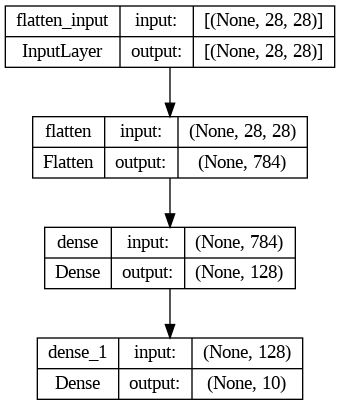

In [1]:
import tensorflow as tf
import numpy as np

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape( (trainX.shape[0], 28,28,1) )
testX = testX.reshape( (testX.shape[0], 28,28,1) )

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
#model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)


from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


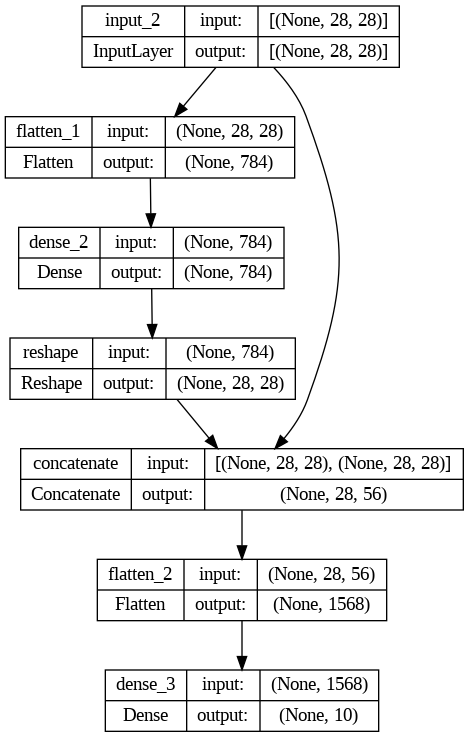

In [3]:
# functional 하게 layer 연결하기
input_1= tf.keras.layers.Input(shape=[28, 28])
flatten_1= tf.keras.layers.Flatten()(input_1)  # input layer -> flatten layer 연결됨
dense_1= tf.keras.layers.Dense(28*28, activation='relu')(flatten_1)   # input layer -> flatten layer -> dense layer 연결됨

# reshape layer
reshape_1= tf.keras.layers.Reshape((28,28))(dense_1) # input layer -> flatten layer -> dense layer -> reshape layer 연결됨

concat1 = tf.keras.layers.Concatenate()([input_1, reshape_1])  # 원래 input 레이어, reshape 레이어를 합침
flatten_2 = tf.keras.layers.Flatten()(concat1)
output = tf.keras.layers.Dense(10, activation='softmax')(flatten_2)  # output의 모양 주의

model = tf.keras.Model(input_1, output)  # 모델 정의 (input layer, output layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])


plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

#model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)